## Adding spotify-style analysis cards 

The goal is to add a feature to the app where users see their summaries in a more "entertaining" way - like the cards from spotify wrapped:

![example cards](images/spotify_wrapped.png)

Some ideas for cards:
 
1. Most popular food entry
2. Total calories (e.g you ate eough calories to fuel a home for 3 weeks or something ridiculous/relatable)
3. total carbs - "500 slices of bread worth of carbs"
4. total protein - "200 chickens worth of protein"
5. average adherence - within 10% of your calories goals for 90% of the days 

Lets start with generating a card for total calories:

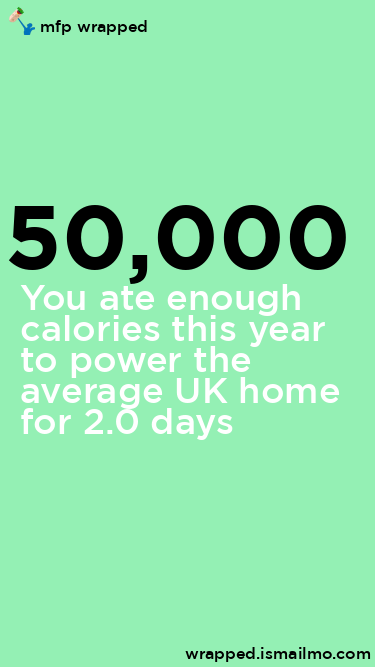

In [92]:
from PIL import Image, ImageDraw, ImageFont

# create base card
width = 375
height = 667
im = Image.new(mode='RGB', size=(width,height), color=(148,240,180))
draw = ImageDraw.Draw(im)

# add mfp wrapped icon and text
icon_fnt = ImageFont.truetype("/home/ismail/.local/share/fonts/GothamMedium.ttf", 16)
icon = Image.open("../app/images/mfp-icon.png")
icon = icon.resize((30,30))
im.paste(icon, (5,5), icon)
draw.text((40,20), "mfp wrapped", font=icon_fnt, fill=(0,0,0))

# add wrapped website
draw.text((width-190,height-20), "wrapped.ismailmo.com", font=icon_fnt, fill=(0,0,0))

# add total figure
num_kcal = 50_000
title_fnt = ImageFont.truetype("/home/ismail/.local/share/fonts/GothamBold.ttf", 90)
draw.text((5,(height/2)-130), f"{num_kcal:,}", font=title_fnt, fill=(0,0,0))

# compare with household power consumption
fnt = ImageFont.truetype("/home/ismail/.local/share/fonts/GothamMedium.ttf", 36)
#  https://shrinkthatfootprint.com/average-household-electricity-consumption/
# average household usage = 29kwH = 25000 kcal
household_daily_usage_kcal = 25_000
draw.text((20,(height/2)-50), f"You ate enough\ncalories this year\nto power the\naverage UK home\nfor {num_kcal/household_daily_usage_kcal} days", font=fnt)

display(im)

Generate top 5 list of food entries

In [103]:
# replace this with the real data in the final app
top_entries= {1:("chicken", 500), 2:("bread", 450),3:("apple", 440),4:("coffee", 420),5:("chocolate", 350)}


# extract card creation into func
def create_base_card(color, font_path, icon_path,height=667, width=375):
    # create base card
    im = Image.new(mode='RGB', size=(width,height), color=color)
    draw = ImageDraw.Draw(im)

    # add mfp wrapped icon and text
    icon_fnt = ImageFont.truetype(font_path, 16)
    icon = Image.open(icon_path)
    icon = icon.resize((30,30))
    im.paste(icon, (5,5), icon)
    draw.text((40,20), "mfp wrapped", font=icon_fnt, fill=(0,0,0))

    # add wrapped website
    draw.text((width-190,height-20), "wrapped.ismailmo.com", font=icon_fnt, fill=(0,0,0))
    return (draw, im)

font_path  ="/home/ismail/.local/share/fonts/GothamMedium.ttf"
icon_path = "../app/images/mfp-icon.png"

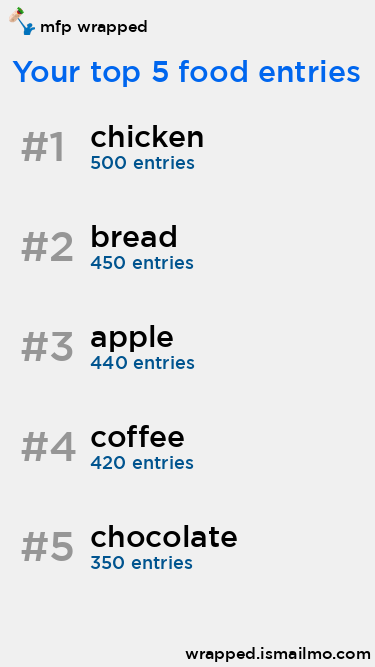

In [158]:
draw, top5_card = create_base_card((240,240,240), font_path, icon_path)

head_fnt = ImageFont.truetype(font_path, 30)
num_fnt = ImageFont.truetype(font_path, 42)
food_fnt = ImageFont.truetype(font_path, 30)
qty_fnt = ImageFont.truetype(font_path, 18)

draw.text((12, 60), "Your top 5 food entries", fill=(0,102,238), font=head_fnt)

for rank, (food, qty) in top_entries.items():
    draw.text((20, (rank*100)+ 30), f"#{rank}", fill=(150,150,150), font=num_fnt)
    draw.text((90, (rank*100)+ 25), food, fill=(0,0,0), font=food_fnt)
    draw.text((90, (rank*100)+ 55), f"{qty} entries", fill=(0,84,143), font=qty_fnt)
# draw.text((20, 230), "#2", fill=(0,0,0), font=num_fnt)
# draw.text((20, 330), "#3", fill=(0,0,0), font=num_fnt)
# draw.text((20, 430), "#4", fill=(0,0,0), font=num_fnt)
# draw.text((20, 530), "#5", fill=(0,0,0), font=num_fnt)

display(top5_card)